# Clustering

Clustering adalah suatu metode dalam machine learning untuk mengelompokkan data data yang mirip

## 1. Import Packages and Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

Untuk clustering ini kita akan menggunakan data driving, dimana kita akan melihat hubungan antara kecepatan dan jarak berkendara

In [3]:
data_clu = pd.read_csv("data_1024.csv", sep=';')
data_clu.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


## 2. Plot Data

pertama kita cek dulu informasi datanya

In [4]:
data_clu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
Driver_ID           4000 non-null int64
Distance_Feature    4000 non-null float64
Speeding_Feature    4000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 93.8 KB


sekarang kita plot datanya pake scatter

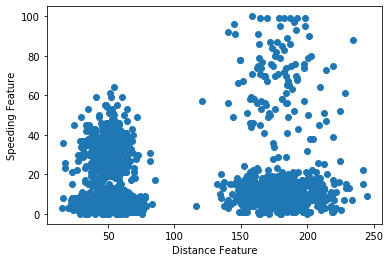

In [5]:
plt.scatter(data_clu['Distance_Feature'], data_clu['Speeding_Feature'])
plt.xlabel('Distance Feature')
plt.ylabel ('Speeding Feature')
plt.show()

nah begitulah persebaran datanya antara speeding dan distance

Kira-kira akan menjadi berapa cluster kah data itu?

## 3. Modelling

### 3.1. K-Means

Dalam K-Means kita sendiri lah yang menentukan jumlah cluster. Sekarang kita akan coba 2 cluster dan 4 cluster 

In [6]:
model_kme = KMeans(n_clusters= 2)
model_kme_2 = KMeans(n_clusters= 4)

set datanya

In [7]:
X = data_clu[['Distance_Feature', 'Speeding_Feature']]

fitting data

In [8]:
model_kme.fit(X)
model_kme_2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

sekarang kita predict datanya

In [9]:
pred_kme = model_kme.predict(X)
pred_kme_2 = model_kme_2.predict(X)

In [10]:
pred_kme

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
pred_kme_2

array([3, 3, 3, ..., 2, 2, 2])

dari pred_kme tersebut maka kita dapat melihat hasil dari pemodelan clustering yang telah kita buat.

sekarang kita visualisasikan hasil clusteringnya

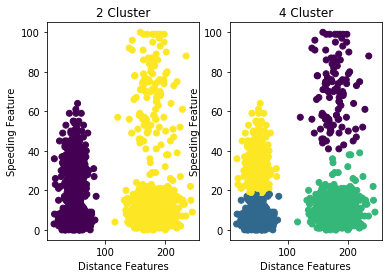

In [12]:
plt.tight_layout()
plt.subplot(121)
plt.scatter(data_clu['Distance_Feature'], data_clu['Speeding_Feature'], c = pred_kme) 
#c itu adalah color dan kita ambil berdasarkan predictnya
plt.xlabel('Distance Features')
plt.ylabel('Speeding Feature')
plt.title('2 Cluster')

plt.subplot(122)
plt.scatter(data_clu['Distance_Feature'], data_clu['Speeding_Feature'], c = pred_kme_2)
plt.xlabel('Distance Features')
plt.ylabel('Speeding Feature')
plt.title('4 Cluster')

plt.show()

nah warna warna itu adalah clusternya, beda warna beda cluster. Kalau kita analisa datanya bisa kita simpulkan bahwa orang yang berkendara dalam jarak di bawah 100 kecepatannya maksimal hanya sekitar 60 sedangkan dalam jarak di atas 100 bisa mencapai 100. Artinya semakin jauh jaraknya maka orang akan cenderung untuk lebih cepat dalam berkendara.

sekarang pertanyaannya adalah sebenarnya berapa clusterkah yang paling baik?

**ELBOW METHOD**

untuk menghitung seberapa baik K-means kita bisa gunakan elbow method. Elbow method digunakan untuk menghitung distortion

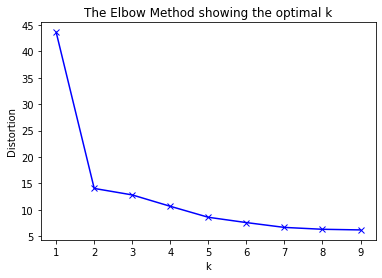

In [13]:
distortions = []
K = range (1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'),axis=1))/ X.shape[0])

# plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

grafik di atas menunjukkan jumlah distortion dengan jumlah cluster dari 1 hingga 9. Untuk menentukan cluster mana yang paling baik dilihat dari yang penurunannya paling curam. Berdasarkan grafik di atas cluster terbaik adalah 2 cluster. Namun sebenarnya jumlah cluster kembali lagi sesuai kebutuhan jika anda memang ingin cluster lebih dari 2 ya monggo

### 3.2. DB-Scan

#### 3.2.1. Without Scaling

In [14]:
model_dbs = DBSCAN(eps=1, min_samples=5)

berhubung di library dbscan gak ada predict jadi kita langsung pake fit_predict

In [15]:
model_dbs.fit_predict(X)

array([-1,  2, -1, ..., 18, 17, 21], dtype=int64)

nah angka angka itu adalah menunjukkan clusternya, kalau -1 berarti dia *outlier*. Sekarang kita pengen liat ada berapa cluster sih yang terbentuk

In [16]:
labels = model_dbs.labels_
labels

array([-1,  2, -1, ..., 18, 17, 21], dtype=int64)

In [17]:
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
# dikurang 1 kalau ada -1 artinya ada outlier, kalau gak ada outliar ya gausah dikurang nanti clusternya kurang dong
# set(labels) artinya mengambil nilai unik dari labels
# len(set(labels)) artinya ada berapa banyak nilai unik dari labels

In [18]:
n_clusters_

26

ternyata ada 26 cluster

#### 3.2.2. With Scaling

kita akan coba scaling dengan standart scaler

In [19]:
from sklearn.preprocessing import StandardScaler

kita scaling dulu datanya, tapi bedain sama data asli

In [20]:
X_sca = StandardScaler().fit_transform(X)
X_sca

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [21]:
X.values

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

setelah itu lakukan seperti yang tadi yaitu fit_predict

In [22]:
model_dbs.fit_predict(X_sca)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

ternyata hasilnya berbeda dari yang tanpa scaling.

sekrang kita hitung jumlah clusternya

In [23]:
labels = model_dbs.labels_

In [24]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

1

ada 1 cluster doang ternyata. Artinya dengan menggunakan scaling ternyata clusternya malah gak keliatan untuk epsilon = 1.

#### 3.2.3. Visualization

kita akan menggunakan model yang agak beda, epsilonnya dikecilin biar ada clusternya

In [25]:
model_dbs = DBSCAN(eps=0.1, min_samples=5)

In [26]:
X = X_sca.copy()
X

array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       ...,
       [ 1.77447381,  0.09331115],
       [ 1.87229869, -0.41738319],
       [ 1.72060465, -0.12555785]])

In [27]:
model_dbs.fit_predict(X)

array([-1,  0,  0, ...,  4,  4,  4], dtype=int64)

nah ternyata ada clusternya malah ada -1 nya atau noise. Nah ada berapa cluster kah yang tercipta?

In [28]:
labels = model_dbs.labels_
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_clusters_

7

ternyata jadi 7 cluster. Sekarang saatnya menggambar

pertama kita bikin dulu yang namanya core sample mask untuk menggambarkan datanya

In [29]:
core_samples_mask = np.zeros_like(model_dbs.labels_, dtype=bool)
core_samples_mask[model_dbs.core_sample_indices_] = True
core_samples_mask

array([False,  True,  True, ...,  True,  True,  True])

nah bentuk datanya boolean, artinya yang false itu outlier yang true itu masuk cluster

In [30]:
unique_labels = set(labels)

seperti biasa kita butuh label uniknya

In [31]:
colors = [plt.cm.Spectral(each)
    for each in np.linspace(0, 1, len(unique_labels))]

codingan di atas adalah untuk bikin warna warnanya nanti buat di plot

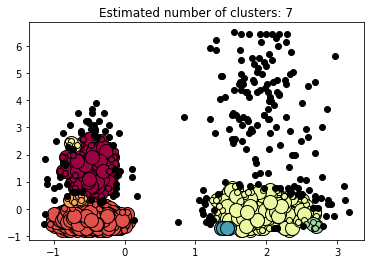

In [32]:
for k, col in zip (unique_labels, colors):
    if k == -1:
        
            # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col), markeredgecolor='k',
        markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
        markerfacecolor=tuple(col),
        markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

nah yang berwarna dan gede gede itu adalah clusternya, yang hitam itu adalah outlier

### 3.3. Hierarcical Clustering

kita akan menggunakan data yang berbeda, untuk hierarcical kita akan buat data sendiri

In [33]:
data = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])
data

array([[ 5,  3],
       [10, 15],
       [15, 12],
       [24, 10],
       [30, 30],
       [85, 70],
       [71, 80],
       [60, 78],
       [70, 55],
       [80, 91]])

pertama coba kita plot dulu datanya

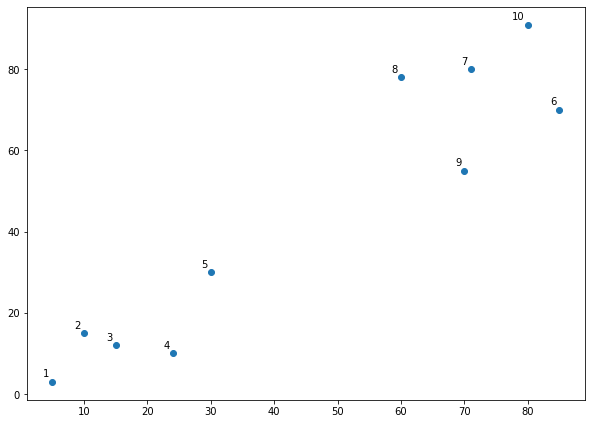

In [34]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(data[:,0], data[:, 1], label= 'True Position')

for label, x, y in zip(labels, data [:, 0], data[:, 1]):
    plt.annotate(label, xy = (x,y), xytext = 
    (-3,3),textcoords='offset points', ha='right',
    va='bottom')
    
plt.show()

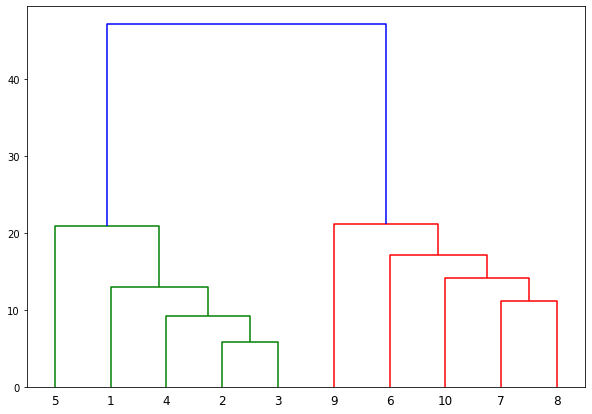

In [35]:
linked = linkage(data, 'single') #pengukuran jarak cluster 
# single artinya nilai terdekat (min)
# complete artinya terjauh (max)
# average artinya rata rata (average)

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top',
          labels=labelList,
          distance_sort='descending',
          show_leaf_counts=True)

plt.show()